# Learning Unit 2 - Visualization - Example

In [1]:
cd ..

/Users/pedro/PycharmProjects/workshop_viz/lisbon.ai-workshop/units


In [2]:
# importing libraries 
import pydotplus
from IPython.display import Image
from sklearn import tree 
import pandas as pd 
import seaborn as sns 
import bokeh 
from matplotlib import pyplot as plt 
from bokeh.io import output_notebook

from utils import load_data, visualizations

# the following are for the charts to display inline 
output_notebook()  
% matplotlib inline 

Loading BokehJS ...

# Inbuilt Pandas plotting 

In [4]:
df1 = load_data.get_correlated_data()

#### Line charts

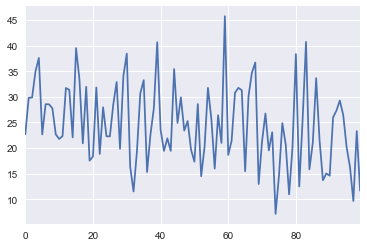

In [5]:
df1['a'].plot()
plt.show()

#### Bar charts

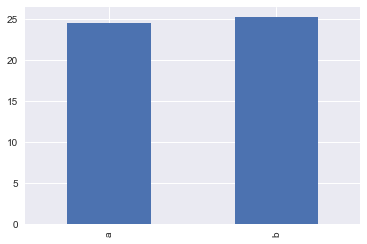

In [6]:
df1.mean().plot(kind='bar')
plt.show()

#### Scatterplots 

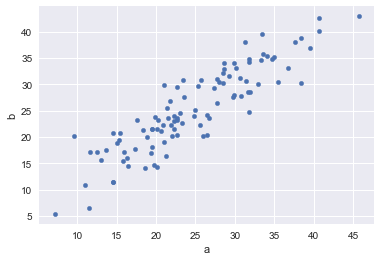

In [7]:
df1.plot(kind='scatter', x='a', y='b')
plt.show()

# Seaborn 

Heatmap 

In [8]:
temperatures = load_data.get_temperature_data()

In [9]:
temperatures.head()

,Min,Mean,Max
Autumn,7,14,25
Spring,6,20,29
Summer,15,25,39
Winter,-2,5,16


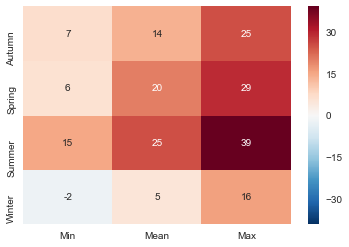

In [10]:
sns.heatmap(temperatures, annot=True)
plt.show()

# Bokeh

Bokeh is extremely [powerful, yet hard to control](https://i.imgur.com/mmPjwCF.gif). 

In [11]:
cross = load_data.get_cross_data()

In [12]:
cross.head()

,a,b,c
0,1.0,1.0,1
1,1.0,112.0,1
2,1.0,223.0,1
3,1.0,334.0,1
4,1.0,445.0,1


In [13]:
visualizations.plot_scatter_3_features(cross, 'a', 'b', 'c', 'My first bokeh plot')

In [14]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [15]:
dt.fit(cross[['b', 'a']], cross['c'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                impurity=True,
                                feature_names=['b', 'a'],
                                class_names=['red', 'green'],
                                filled=True, rounded=True,
                                special_characters=True)

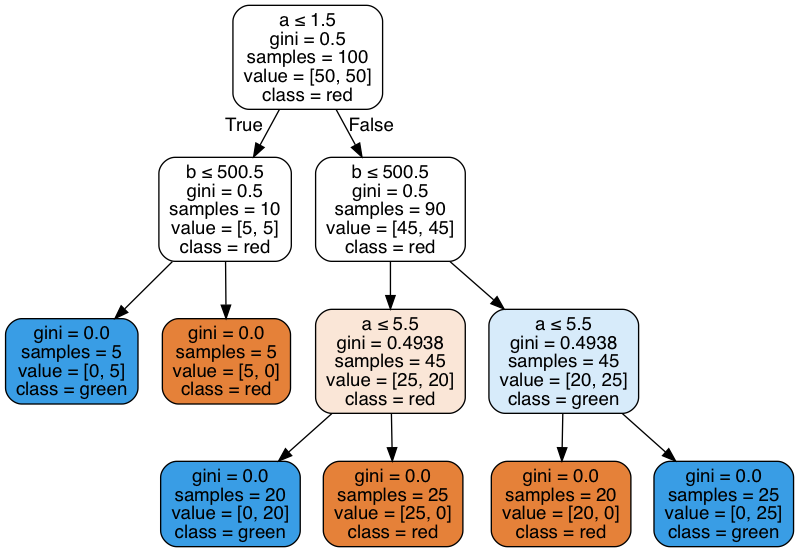

In [17]:
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

Very interesting. Now consider that first split. Pretty weird huh? Any idea why it split at such a stupid place? 

## TODO: give them the answer, but force them to say they are too lazy to answer 

_Note: You might have noticed we fit the tree with `dt.fit(cross['b', 'a'], cross['c'])` instead of `dt.fit(cross['a', 'b'], cross['c'])`  
This was for a [very technical reason](https://i.imgflip.com/1ydlm5.jpg)_